# CS109a Final Project: Group 90 <br>Predicting damage of US storms<br>
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave
#### Harvard University <br> Fall 2017 <br> 
#### Date: December 7, 2017<br> Written By: George Hu, Manav Khandelwal, Josh Kuppersmith Evan Mackay <br> 

---




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from zipcode
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

# Part 1: Loading In Data

In [2]:
# load in all data for 2016 and 2017

details_2016 = pd.read_csv('Details_2016.csv')
details_2017 = pd.read_csv('Details_2017.csv')
locations_2016 = pd.read_csv('Locations_2016.csv')
locations_2017 = pd.read_csv('Locations_2017.csv')
fatalities_2016 = pd.read_csv('Fatalities_2016.csv')
fatalities_2017 = pd.read_csv('Fatalities_2017.csv')

print(details_2016.shape)
details_2016.head()

(55964, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [3]:
# vertically merge

details = pd.concat([details_2016, details_2017])
locations = pd.concat([locations_2016, locations_2017])
fatalities = pd.concat([fatalities_2016, fatalities_2017])

print(details.shape)
details.head()

(103177, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


# Part 2: Preliminary Data Analysis and Cleaning

In [4]:
# look at column names

print(list(details.columns))
print()
print(list(locations.columns))
print()
print(list(fatalities.columns))

['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']

['YEARMONTH', 'EPISODE_ID', 'EVENT_ID', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']

['FAT_YEARMONTH', 'FAT_DAY', 'FAT_TIME', 'FATALITY_ID', 'EVENT_ID', 'FATALITY_TYPE', 'FATALITY_DATE', 'FA

In [5]:
# re-format Property and Crop Damage

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in details["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
damage_crops = []
for i in details["DAMAGE_CROPS"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_crops.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_crops.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_crops.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_crops.append(dam)
                except:
                    print(i)
                    
details["DAMAGE_PROPERTY"] = damage_property
details["DAMAGE_CROPS"] = damage_crops

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)
        
# create new Total Damage Column
    
details['DAMAGE_TOTAL'] = details['DAMAGE_PROPERTY'] + details['DAMAGE_CROPS']

20501
20501


In [6]:
# Make new categorical column for has_damage

has_damage = []
for x in details['DAMAGE_TOTAL']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

details['HAS_DAMAGE'] = has_damage
details['HAS_DAMAGE'].head()

0    1
1    0
2    0
3    0
4    0
Name: HAS_DAMAGE, dtype: int64

In [7]:
# merge details and location data

data = pd.merge(details, locations, how='inner', on=['EPISODE_ID', 'EVENT_ID'])
print(data.shape)
data.head()

## NOTE: possibility to merge on fatalities, but there are very few (766) so this would be a special case model
## perhaps use for some final added analysis
## data = pd.merge(data1, fatalities, how='inner', on=['EVENT_ID'])

(87563, 62)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,DAMAGE_TOTAL,HAS_DAMAGE,YEARMONTH,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.0,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,0.0,0,201603,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.0,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,1000.0,1,201603,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.0,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,0.0,0,201607,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.0,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,0.0,0,201607,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.0,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,0.0,0,201607,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


# Part 3: Some of our EDA

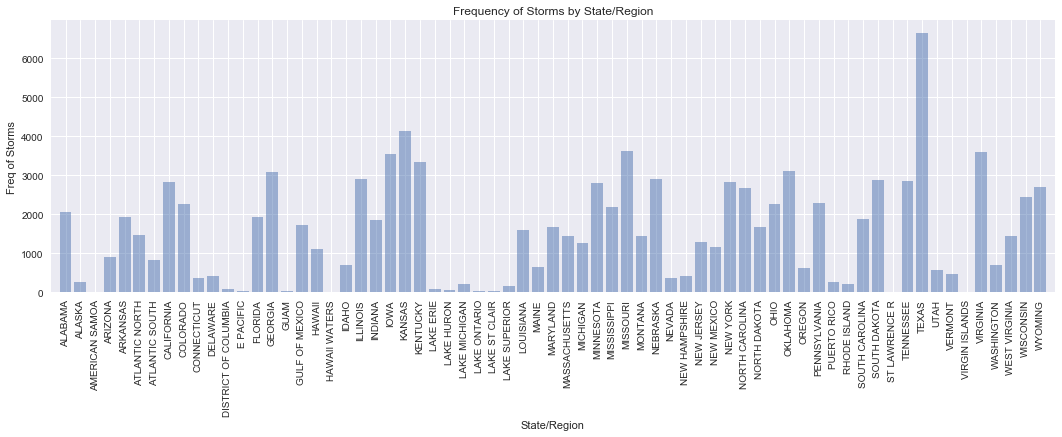

In [8]:
# storm counts by state

import seaborn as sns
sns.set(color_codes=True)
storm_counts_loc = np.unique(details['STATE'], return_counts=True)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(67), storm_counts_loc[1], align='center', alpha=0.5)
ax.set_xlim([-1, 67])
ax.set_xticks(range(67))
ax.set_xticklabels(storm_counts_loc[0], rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by State/Region')

plt.show()

(array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'], dtype=object), array([10699,  9110,  4514,  8680,  8563, 16912, 13249, 10688, 13064,
        2066,  2349,  3283]))


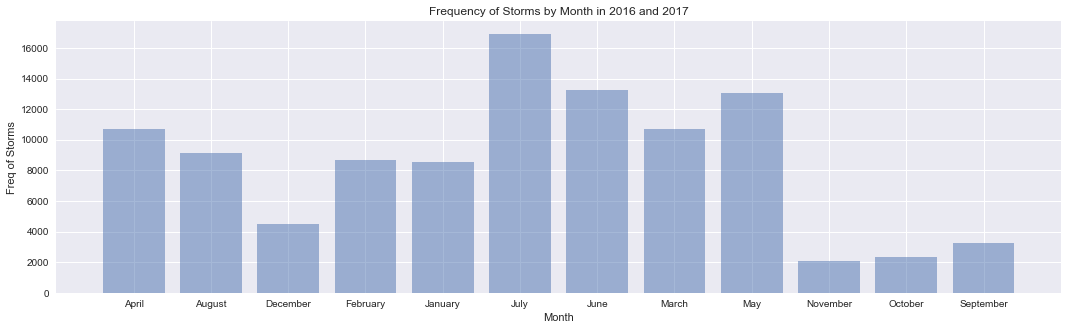

In [9]:
# storm count by month

storm_counts_mo = np.unique(details['MONTH_NAME'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(12), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Month in 2016 and 2017')

plt.show()

(array([2016, 2017]), array([55964, 47213]))


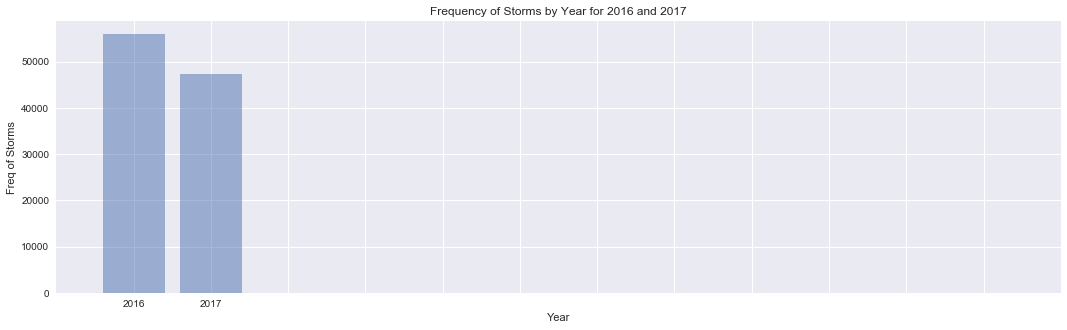

In [10]:
# storm count by year

storm_counts_mo = np.unique(details['YEAR'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(2), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Year for 2016 and 2017')

plt.show()

In [11]:
# EDA, out of storms with damage, where are they occuring

damage_data = data[data['HAS_DAMAGE'] == 1]
print(len(damage_data))

24940


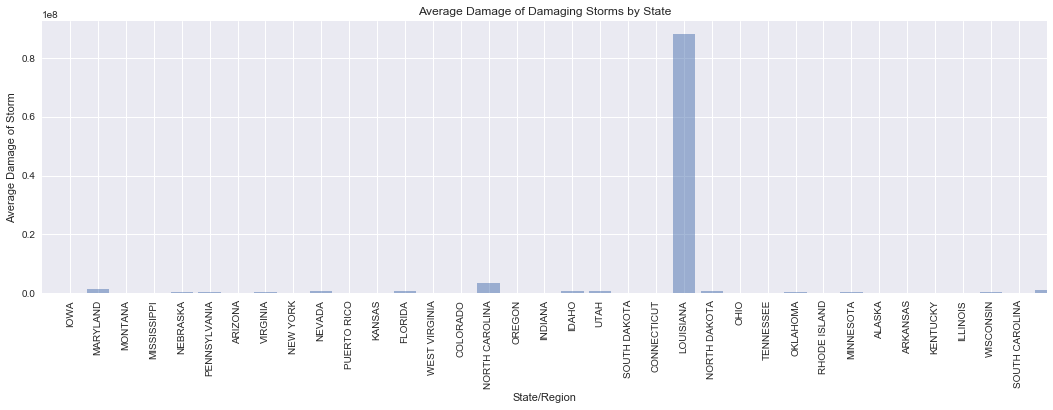

In [12]:
# display average damage per state given causes damage

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_TOTAL']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)
        
# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(ave_per_state)), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

['Flash Flood', 'Heavy Rain', 'Debris Flow', 'Marine Thunderstorm Wind', 'Thunderstorm Wind', 'Dust Devil', 'Tornado', 'Marine Strong Wind', 'Flood', 'Hail', 'Lightning', 'Waterspout', 'Funnel Cloud']


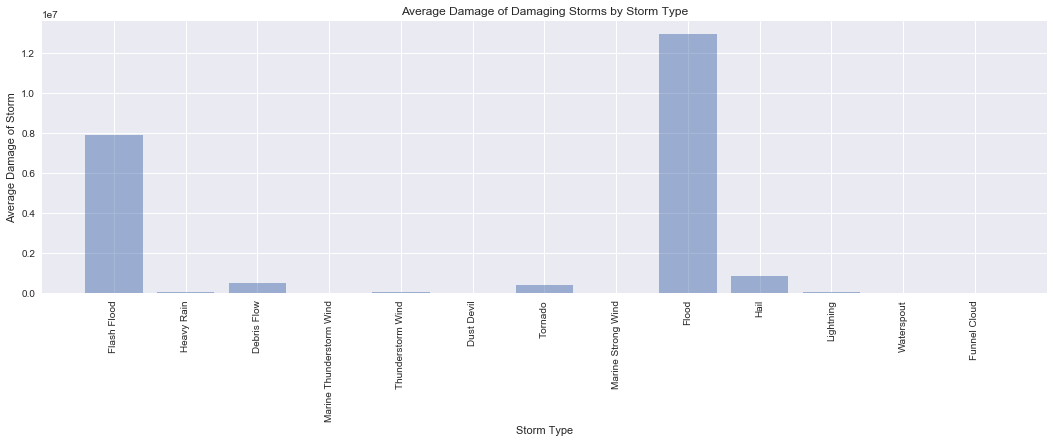

In [13]:
# display average damage per storm type given causes damage

sns.set(color_codes=True)

storm_types = list(set(damage_data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = damage_data[damage_data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

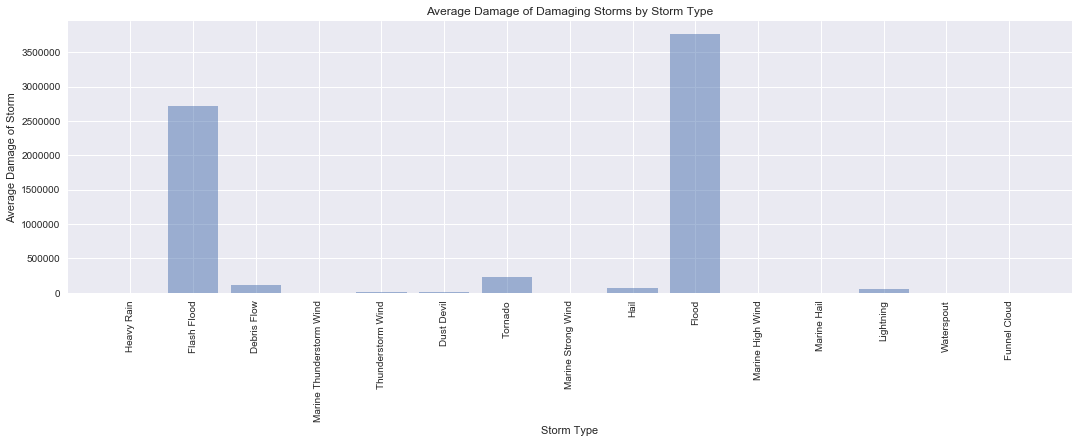

In [14]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

# Part 4: More Cleaning and *Handling of Nulls*

In [15]:
# drop null rows and check if any null values remaining
# MORE ROBUST

print(data.shape)
data.dropna(inplace=True, subset = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS','BEGIN_YEARMONTH', 'BEGIN_DAY','STATE_FIPS', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 50000 rows
# need to do better than this! Handle later on

(87563, 62)
(31659, 62)


### EDA on Our Response Variable

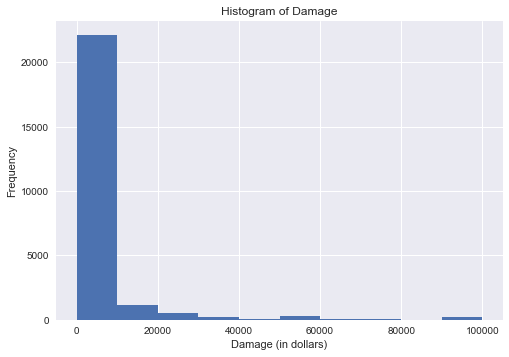

In [16]:
data["DAMAGE_PROPERTY"] = pd.Series(damage_property)
plt.hist(x=data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY <= 100000])
plt.xlabel("Damage (in dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [17]:
np.corrcoef(data["DAMAGE_TOTAL"],data["DEATHS_DIRECT"])

array([[  1.00000000e+00,  -2.09943846e-04],
       [ -2.09943846e-04,   1.00000000e+00]])

In [18]:
# validation of our damage estimates
data.DAMAGE_TOTAL[data.DAMAGE_TOTAL > 100000].shape

(443,)

In [19]:
import scipy.stats as ss
print("Mean: {}".format(round(np.mean(data.DAMAGE_TOTAL)),4))
print("Median: {}".format(np.median(data.DAMAGE_TOTAL)))
print("Skew: {}".format(round(ss.skew(data.DAMAGE_TOTAL),2)))

Mean: 33968
Median: 0.0
Skew: 146.33


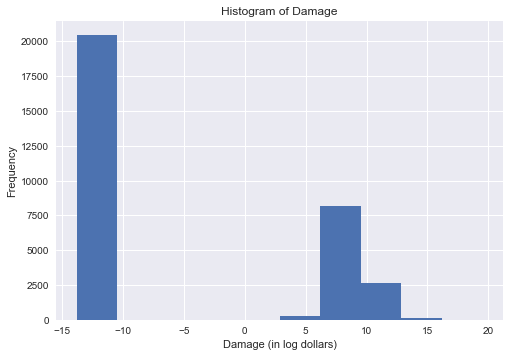

In [20]:
# we see our big concentration at 0, and a (hopefully) near-normal distribution otherwise

plt.hist(x=np.log(data.DAMAGE_TOTAL + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

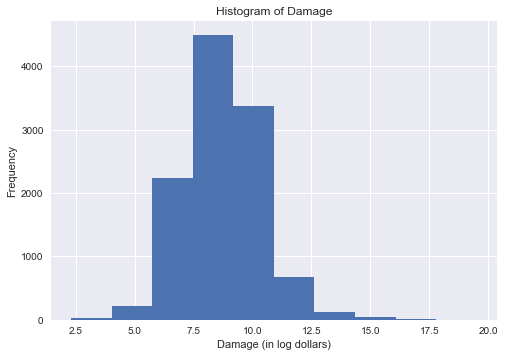

In [21]:
# confirming near-normal response for data with a damage over 0

plt.hist(x=np.log(data.DAMAGE_TOTAL[data.DAMAGE_TOTAL>0] + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

# Part 5: Zipcode Work

In [ ]:
zip_data = pd.read_csv("AfterGotZips2016.csv", 
                      encoding = "ISO-8859-1")
zip_data["BEGIN_ZIP"].head()

In [ ]:
import requests

s = requests.session()
#s.headers['user-agent'] = 'Mozilla/5.0'
print(s) 
r = s.get('https://factfinder.census.gov/rest/communityFactsNav/nav', params={'searchTerm': 99501})
r
type(r.json())

In [ ]:
r.json().keys()
r.json()['CFMetaData'].keys()

In [ ]:
r.json()['CFMetaData']['measureAndLinksContent']

In [ ]:
html = r.json()['CFMetaData']['measureAndLinksContent']

In [ ]:
s.get('https://factfinder.census.gov/bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US99501')
r = s.get('https://factfinder.census.gov/tablerestful/tableServices/renderProductData')
r.json().keys()
#['ProductData']
r.json()['ProductData'].keys()

In [ ]:
import requests
s = requests.session()
s.headers['user-agent'] = 'Mozilla/5.0'

s.get('https://factfinder.census.gov/bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US99501')
#<Response [200]>
r = s.get('https://factfinder.census.gov/tablerestful/tableServices/renderProductData')
r.json().keys()
#['ProductData']
r.json()['ProductData']['productDataTable'][:50]

In [ ]:
import requests
from   bs4 import BeautifulSoup
from IPython.core.display import display, HTML

# This is just to get the column names

zipcodes = ['32963']

base   = 'https://factfinder.census.gov/'
report = base + 'bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US'
render = base + 'tablerestful/tableServices/renderProductData'

with requests.session() as s:

    for zipcode in zipcodes:
        s.get(report + zipcode)
        r = s.get(render)

        html = r.json()['ProductData']['productDataTable']
        soup = BeautifulSoup(html, 'html.parser')
        
        rows = soup.find("table").find_all("tr")[2:217]
        
        my_cols = []
        
        for row in rows:
            headers = row.find_all("th")
            for header in headers:
                actual_header = header.get_text()
                count = actual_header + "count"
                perc = actual_header + "percent"
                my_cols.append(count)
                my_cols.append(perc)

In [ ]:
unknown_counter = 0
print(len(zip_data["BEGIN_ZIP"][24256:]))
print(len(zip_data["BEGIN_ZIP"]))

In [ ]:
# This part is just extracting data then


zipcodes = zip_data["BEGIN_ZIP"][24256:]

scraped = pd.DataFrame()

base   = 'https://factfinder.census.gov/'
report = base + 'bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US'
render = base + 'tablerestful/tableServices/renderProductData'

with requests.session() as s:
    #s.headers['user-agent'] = 'Mozilla/5.0'

    for zipcode in zipcodes:
        #print(zipcode)
        
        if zipcode == "Unknown":
            unknown_counter = unknown_counter + 1
        
        else:
            
            time.sleep(3)
            s.get(report + zipcode)
            r = s.get(render)

            html = r.json()['ProductData']['productDataTable']
            soup = BeautifulSoup(html, 'html.parser')
            #print(soup)

            rows = soup.find("table").find_all("tr")[2:217]

            my_cols = []
            my_data = []
            data_zipcode = {}

            for row in rows:
                #print("inhere")
                #print(row)
                headers = row.find_all("th")
                for header in headers:
                    actual_header = header.get_text()

                    count = actual_header + "count"
                    perc = actual_header + "percent"

                    my_cols.append(count)
                    my_cols.append(perc)

                datums = row.find_all("td") # + row.find_all("th")
                #print(datums)

                actual_data = []

                for datum in datums:
                    #print(datum)
                    actual_data.append(datum.get_text())
                    my_data.append(datum.get_text())
                    #print(datum.get_text())
                #print(actual_data)

                data_zipcode[actual_header] = actual_data
            #print(my_data)
            #print(zipcode)
            my_data = [zipcode] + my_data
            #print(my_data)
            scraped[zipcode] = my_data
    #         print(rows)
    #         datums = rows.find_all("td")[0]
    #         print('now datums')
    #         print(datums.get_text())

            #display(HTML(soup.prettify()))

In [ ]:
scraped.shape

In [ ]:
if my_cols[0] != "Zipcode":
    my_cols = ["Zipcode"] + my_cols
better_scraped = scraped.transpose()
better_scraped
print(len(my_cols))
print(better_scraped.shape)

In [ ]:
better_scraped.columns = my_cols
better_scraped

In [ ]:
better_scraped.to_csv("32_457_MonPM2010.csv")

In [ ]:
better_scraped_remove_r = pd.read_csv("ScrapedZipCodeInfo.csv", encoding = "ISO-8859-1")
better_scraped_remove_r.head()

In [ ]:
better_scraped_remove_r.to_csv("ScrapedZipCodeInfo_NoR.csv")

In [ ]:
example = "308,745,538(r38234)"
example.split("(")[0]

In [ ]:
better_scraped_remove_r["Total populationcount"][58:68]

In [ ]:
file = open("laborforce_annual_2015.txt", "r") 
file.read() 

# Part 6: More EDA

In [ ]:
## Focus on EDA to see what from the zipcode data might be useful

# Part 7: Merge Data and Prepare Predictors

In [22]:
## WORK TO MERGE IN ZIPCODE DATA
## THEN IT CAN BE USED FOR PRELIMINARY MODEL

In [23]:

#train_cols = cols.remove([['BEGIN_YEARMONTH', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'AZIMUTH', 'LOCATION', 'LAT2', 'LON2']])
#train_cols = ['BEGIN_DAY', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE', 'STATE', 'EVENT_TYPE', 'CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE']
train_cols = ['EVENT_TYPE', 'STATE', 'MAGNITUDE', 'CZ_TIMEZONE', 'RANGE', 'LATITUDE', 'LONGITUDE']

X = data[train_cols]
y = data['HAS_DAMAGE']

#X = pd.get_dummies(X, columns=['STATE','EVENT_TYPE','CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE'], drop_first=True)
X = pd.get_dummies(X, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Part 8: Preliminary Classification Model

In [26]:
# fit prelim model

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

#print(X_train[X_train.isnull().any(axis=1)].size)
#print(y_train[y_train.isnull()].size)
#print(X_test[X_test.isnull().any(axis=1)].size)
#print(y_test[y_test.isnull()].size)

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))


Num points without damage: 20454
Num points with damage: 11205

Training Accuracy: 0.818443260572
Testing Accuracy: 0.820444104135


# Part 9: Improving Classification Model

# Part 10: Preliminary Regression Model

# Part 11:  Improving Regression Model

# Part 12: Model Analysis and Presentation